In [1]:
!pip install -q seaborn
!pip install -q "git+https://github.com/tensorflow/docs"

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
print(np.__version__)

1.18.1


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [24]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [8]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")



In [9]:
dataset_path


'/root/.keras/datasets/auto-mpg.data'

In [10]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values= "?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [14]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset = dataset.dropna()

In [12]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [13]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [14]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [15]:
train_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0
182,28.0,4,107.0,86.0,2464.0,15.5,76,1,0,0


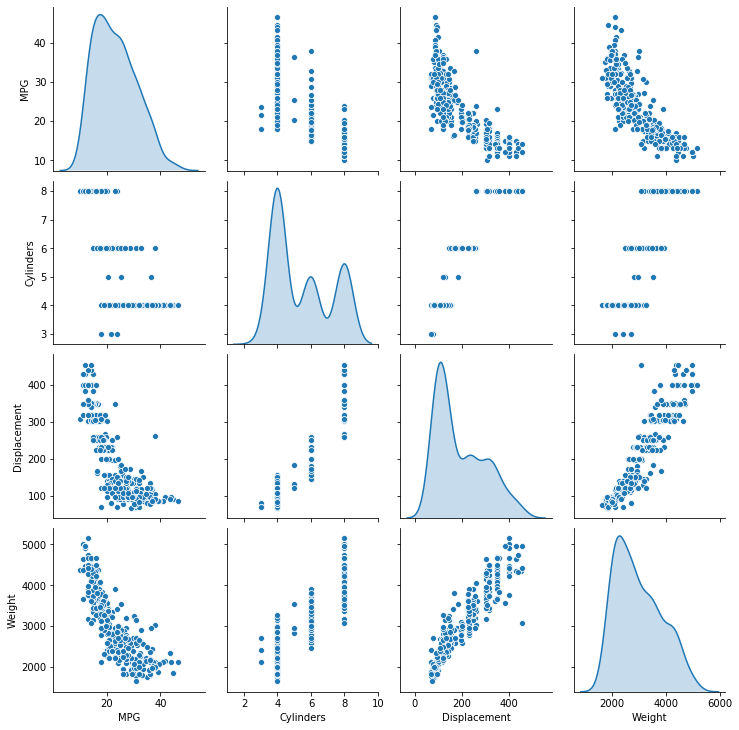

In [16]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [17]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [18]:
train_labels.tail()

281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, dtype: float64

In [19]:
train_stats= train_dataset.describe()
train_stats= train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [20]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.465148,-0.495225,0.774676
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.465148,-0.495225,0.774676
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-0.465148,2.012852,-1.286751
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-0.465148,2.012852,-1.286751
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,2.143005,-0.495225,-1.286751


In [21]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model = build_model()

In [22]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.3201461 ],
       [-0.27199876],
       [-0.72808355],
       [-0.54952556],
       [-0.9107833 ],
       [-0.13411503],
       [-0.94124925],
       [-0.6029282 ],
       [-0.11610223],
       [-0.7303052 ]], dtype=float32)

In [25]:
EPOCHS = 1000
history = model.fit(
normed_train_data, train_labels, epochs=EPOCHS, validation_split= 0.2, verbose=0, 
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:588.1726,  mae:23.0258,  mse:588.1725,  val_loss:580.7383,  val_mae:22.8408,  val_mse:580.7383,  
....................................................................................................
Epoch: 100, loss:5.8815,  mae:1.6906,  mse:5.8815,  val_loss:8.5768,  val_mae:2.2155,  val_mse:8.5768,  
....................................................................................................
Epoch: 200, loss:5.3059,  mae:1.5789,  mse:5.3059,  val_loss:8.5852,  val_mae:2.2749,  val_mse:8.5852,  
....................................................................................................
Epoch: 300, loss:4.8110,  mae:1.5245,  mse:4.8110,  val_loss:8.5813,  val_mae:2.2213,  val_mse:8.5813,  
....................................................................................................
Epoch: 400, loss:4.2869,  mae:1.3767,  mse:4.2869,  val_loss:8.7571,  val_mae:2.2741,  val_mse:8.7571,  
..............................................................

In [26]:
hist = pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,588.172579,23.025789,588.172546,580.738316,22.840799,580.738342
1,541.121926,21.999193,541.121887,536.856005,21.877916,536.856018
2,500.541230,21.074812,500.541229,492.501898,20.854918,492.501892
3,457.420409,20.069273,457.420410,443.969102,19.703114,443.969116
4,410.885369,18.940170,410.885376,392.635980,18.409229,392.635986
...,...,...,...,...,...,...
995,2.536943,1.009552,2.536943,11.959059,2.720634,11.959060
996,2.704434,1.057629,2.704434,12.022548,2.729078,12.022548
997,2.641062,1.064600,2.641062,11.919889,2.710272,11.919888
998,2.530536,1.005816,2.530536,12.007945,2.711007,12.007945


In [27]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

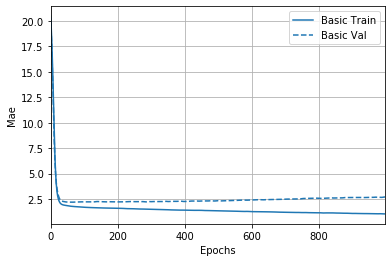

In [28]:
plotter.plot({'Basic': history}, metric= 'mae')

(0, 20)

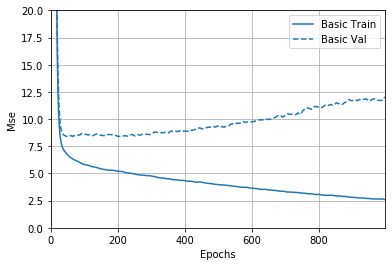

In [31]:
plotter.plot({ 'Basic': history}, metric='mse')
plt.ylim([0,20])

(0, 20)

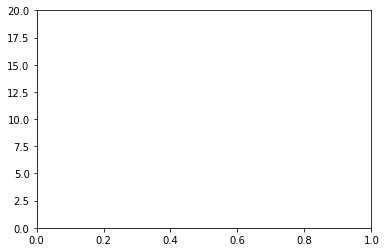

In [30]:
plt.ylim([0, 20])

In [32]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.6925,  mae:1.0368,  mse:2.6925,  val_loss:11.9510,  val_mae:2.7017,  val_mse:11.9510,  
................

In [34]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 7.7287 - mae: 2.3234 - mse: 7.7287
Testing set Mean Abs Error:  2.32 MPG


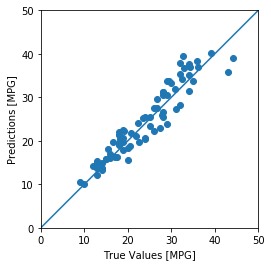

In [36]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)